In [2]:
from numpy.linalg import norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from joblib import Parallel, delayed

In [3]:
np.random.seed(100)

def training_set(n, tau, d, s):
    x_train = np.zeros((d, n))
    for i in range(n):
        nonzero_indices = np.random.choice(d, s, replace=False)
        nonzero_values = np.random.uniform(-1, 1, s)
        x0 = np.zeros(d)
        x0[nonzero_indices] = nonzero_values
        x_train[:, i] = x0 / norm(x0, ord=2)
    y_train = x_train + np.random.normal(0, tau, size=(d, n))
    return x_train, y_train


In [ ]:
va = 0.01
N_train = 1000
x_train, y_train = training_set(N_train, va)  # every element is in a column

fig, (ax_orig, ax_filtered) = plt.subplots(2, 1, sharex=True, figsize=(20, 10), dpi=100)
ax_orig.stem(x_train[:, 2])
ax_orig.set_title('Original pulse', fontsize=20)
ax_orig.set_xlim(0, d - 1)
ax_orig.tick_params(axis='y', labelsize=15)
ax_filtered.stem(y_train[:, 2])
ax_filtered.set_title('Noisy signal', fontsize=20)
ax_filtered.margins(0, 0.1)
ax_filtered.tick_params(axis='y', labelsize=15)
plt.xticks(fontsize=15)
#plt.savefig("./noisy_sparse_signal.pdf", bbox_inches='tight')
plt.tight_layout()
plt.show()

In [184]:
# Functions

# We compute here D_||.||_1(x, y). Inputs vectors, outputs number  
def breg_dist_l1(x, y): 
    norm_x = norm(x, ord=1)
    dot_prod = np.dot(np.sign(y), x)
    return norm_x - dot_prod

def st(x, threshold):
    return np.sign(x) * np.maximum(0, np.abs(x) - threshold)
    
def train_l1(x_tr, y_tr, la):  # lamb is a number here
    f_lasso = st(y_tr, la)
    distances = []
    for i in range(x_tr.shape[1]):
        err = breg_dist_l1(x_tr[:, i], f_lasso[:, i])
        distances.append(err)
    return np.mean(distances)

def get_lambda(x_tr, y_tr, lamb):  # here lambda is a vector
    l1_err = np.array([train_l1(x_tr, y_tr, l) for l in lamb])
    index = np.argmin(l1_err)
    return lamb[index], l1_err.min()


In [181]:
# Figure 6
np.random.seed(100)

va = .25 # must be >=0.05, if not D_j doesnt see the differences
N_train = 10
d = 1024
s = 64
x_Train, y_Train = training_set(N_train, va, d, s)  # every element is in a column
lamb = np.logspace(-4, 1, num=1000)

In [182]:
values = []
for lam in lamb:
    values.append(train_l1(x_Train, y_Train, lam))

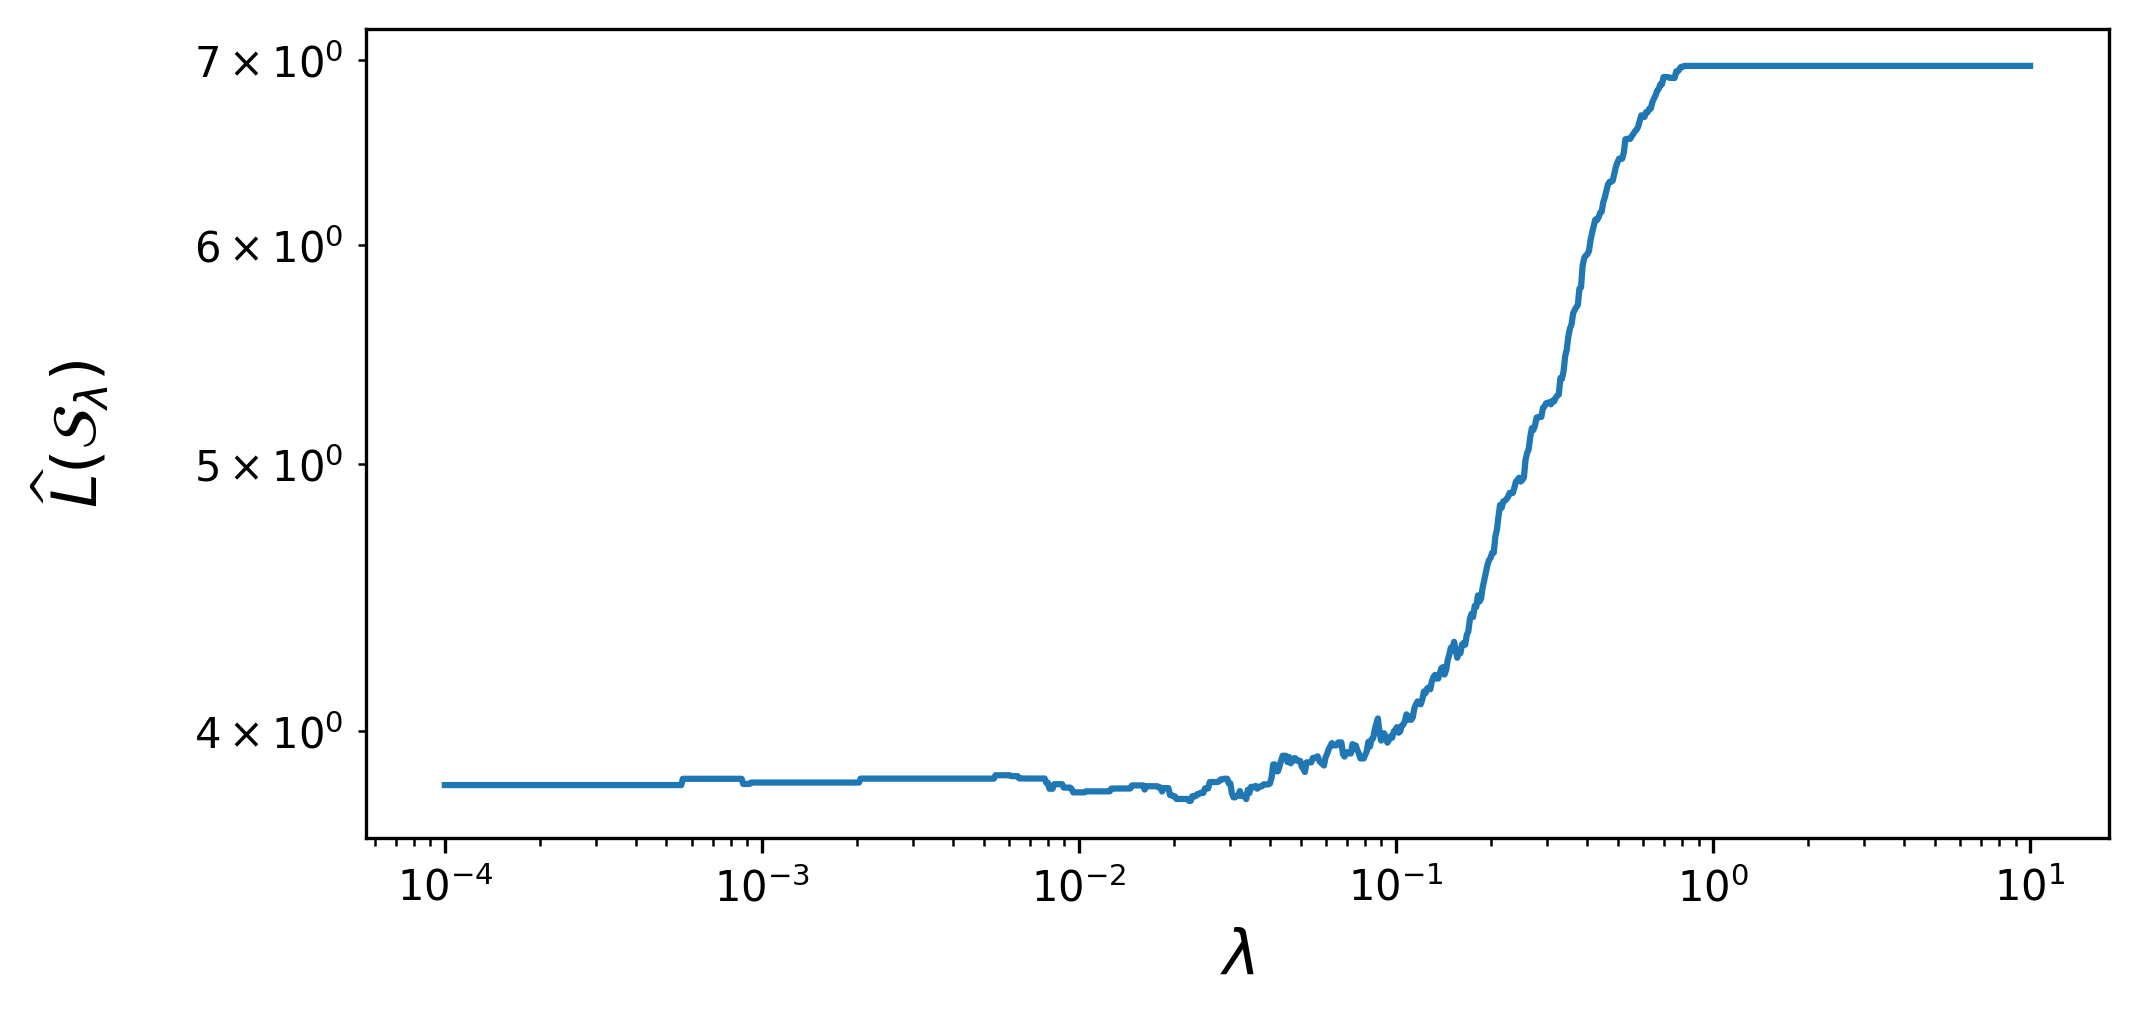

In [183]:
fig, ax1 = plt.subplots(figsize=(7.5, 3.5), dpi=300)
ax1.plot(lamb, values, '-')
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_ylabel(r'$\widehat{L}(\mathcal{S}_{\lambda})$', fontsize=15, labelpad=20)
ax1.set_xlabel(r'$\lambda$', fontsize=15)
ax1.tick_params(axis='x', labelsize=10)

plt.yticks(fontsize=25)
plt.savefig("./fig6.pdf", bbox_inches='tight')  # This shud go before show
plt.show()
#plt.show(block=False)

In [ ]:
values = []
for i in range(N_train):
    values.append(np.linalg.norm(x_Train[:, i], ord=1))
np.mean(values)

In [ ]:
vals = []
for i in range(N_train):
    vals.append(np.linalg.norm(x_Train[:, i], ord=1) - np.dot(np.sign(y_Train[:, i]), x_Train[:, i]))
np.mean(vals)

In [171]:
# Figure 7
lamb = np.logspace(-6, 0, num=500)
N_vec = np.arange(1, 21)
n_it = 30

va = 0.25 # must be >=0.05, if not D_j doesnt see the differences
N_train = 1000

d1 = 512
d2 = 1024
d3 = 2048

s = 32

x_Train1, y_Train1 = training_set(N_train, va, d1, s)
x_Train2, y_Train2 = training_set(N_train, va, d2, s)
x_Train3, y_Train3 = training_set(N_train, va, d3, s)# every element is in a column

lamb_hatn1 = np.zeros((len(N_vec), n_it))
L_at_lhatn1 = np.zeros((len(N_vec), n_it))

lamb_hatn2 = np.zeros((len(N_vec), n_it))
L_at_lhatn2 = np.zeros((len(N_vec), n_it))

lamb_hatn3 = np.zeros((len(N_vec), n_it))
L_at_lhatn3 = np.zeros((len(N_vec), n_it))

for i in range(len(N_vec)):
    print('n=', N_vec[i])
    for j in range(n_it):
        xsmall1, ysmall1 = training_set(N_vec[i], va, d1, s)
        
        lamb_hatn1[i, j] = get_lambda(xsmall1, ysmall1, lamb)[0]
        L_at_lhatn1[i, j] = train_l1(x_Train1, y_Train1, lamb_hatn1[i, j])

        xsmall2, ysmall2 = training_set(N_vec[i], va, d2, s)
        
        lamb_hatn2[i, j] = get_lambda(xsmall2, ysmall2, lamb, d2, s)[0]
        L_at_lhatn2[i, j] = train_l1(x_Train2, y_Train2, lamb_hatn2[i, j])

        xsmall3, ysmall3 = training_set(N_vec[i], va, d3, s)
        
        lamb_hatn3[i, j] = get_lambda(xsmall3, ysmall3, lamb)[0]
        L_at_lhatn3[i, j] = train_l1(x_Train3, y_Train3, lamb_hatn3[i, j])


n= 1
n= 2
n= 3
n= 4
n= 5
n= 6
n= 7
n= 8
n= 9
n= 10
n= 11
n= 12
n= 13
n= 14
n= 15
n= 16
n= 17
n= 18
n= 19
n= 20


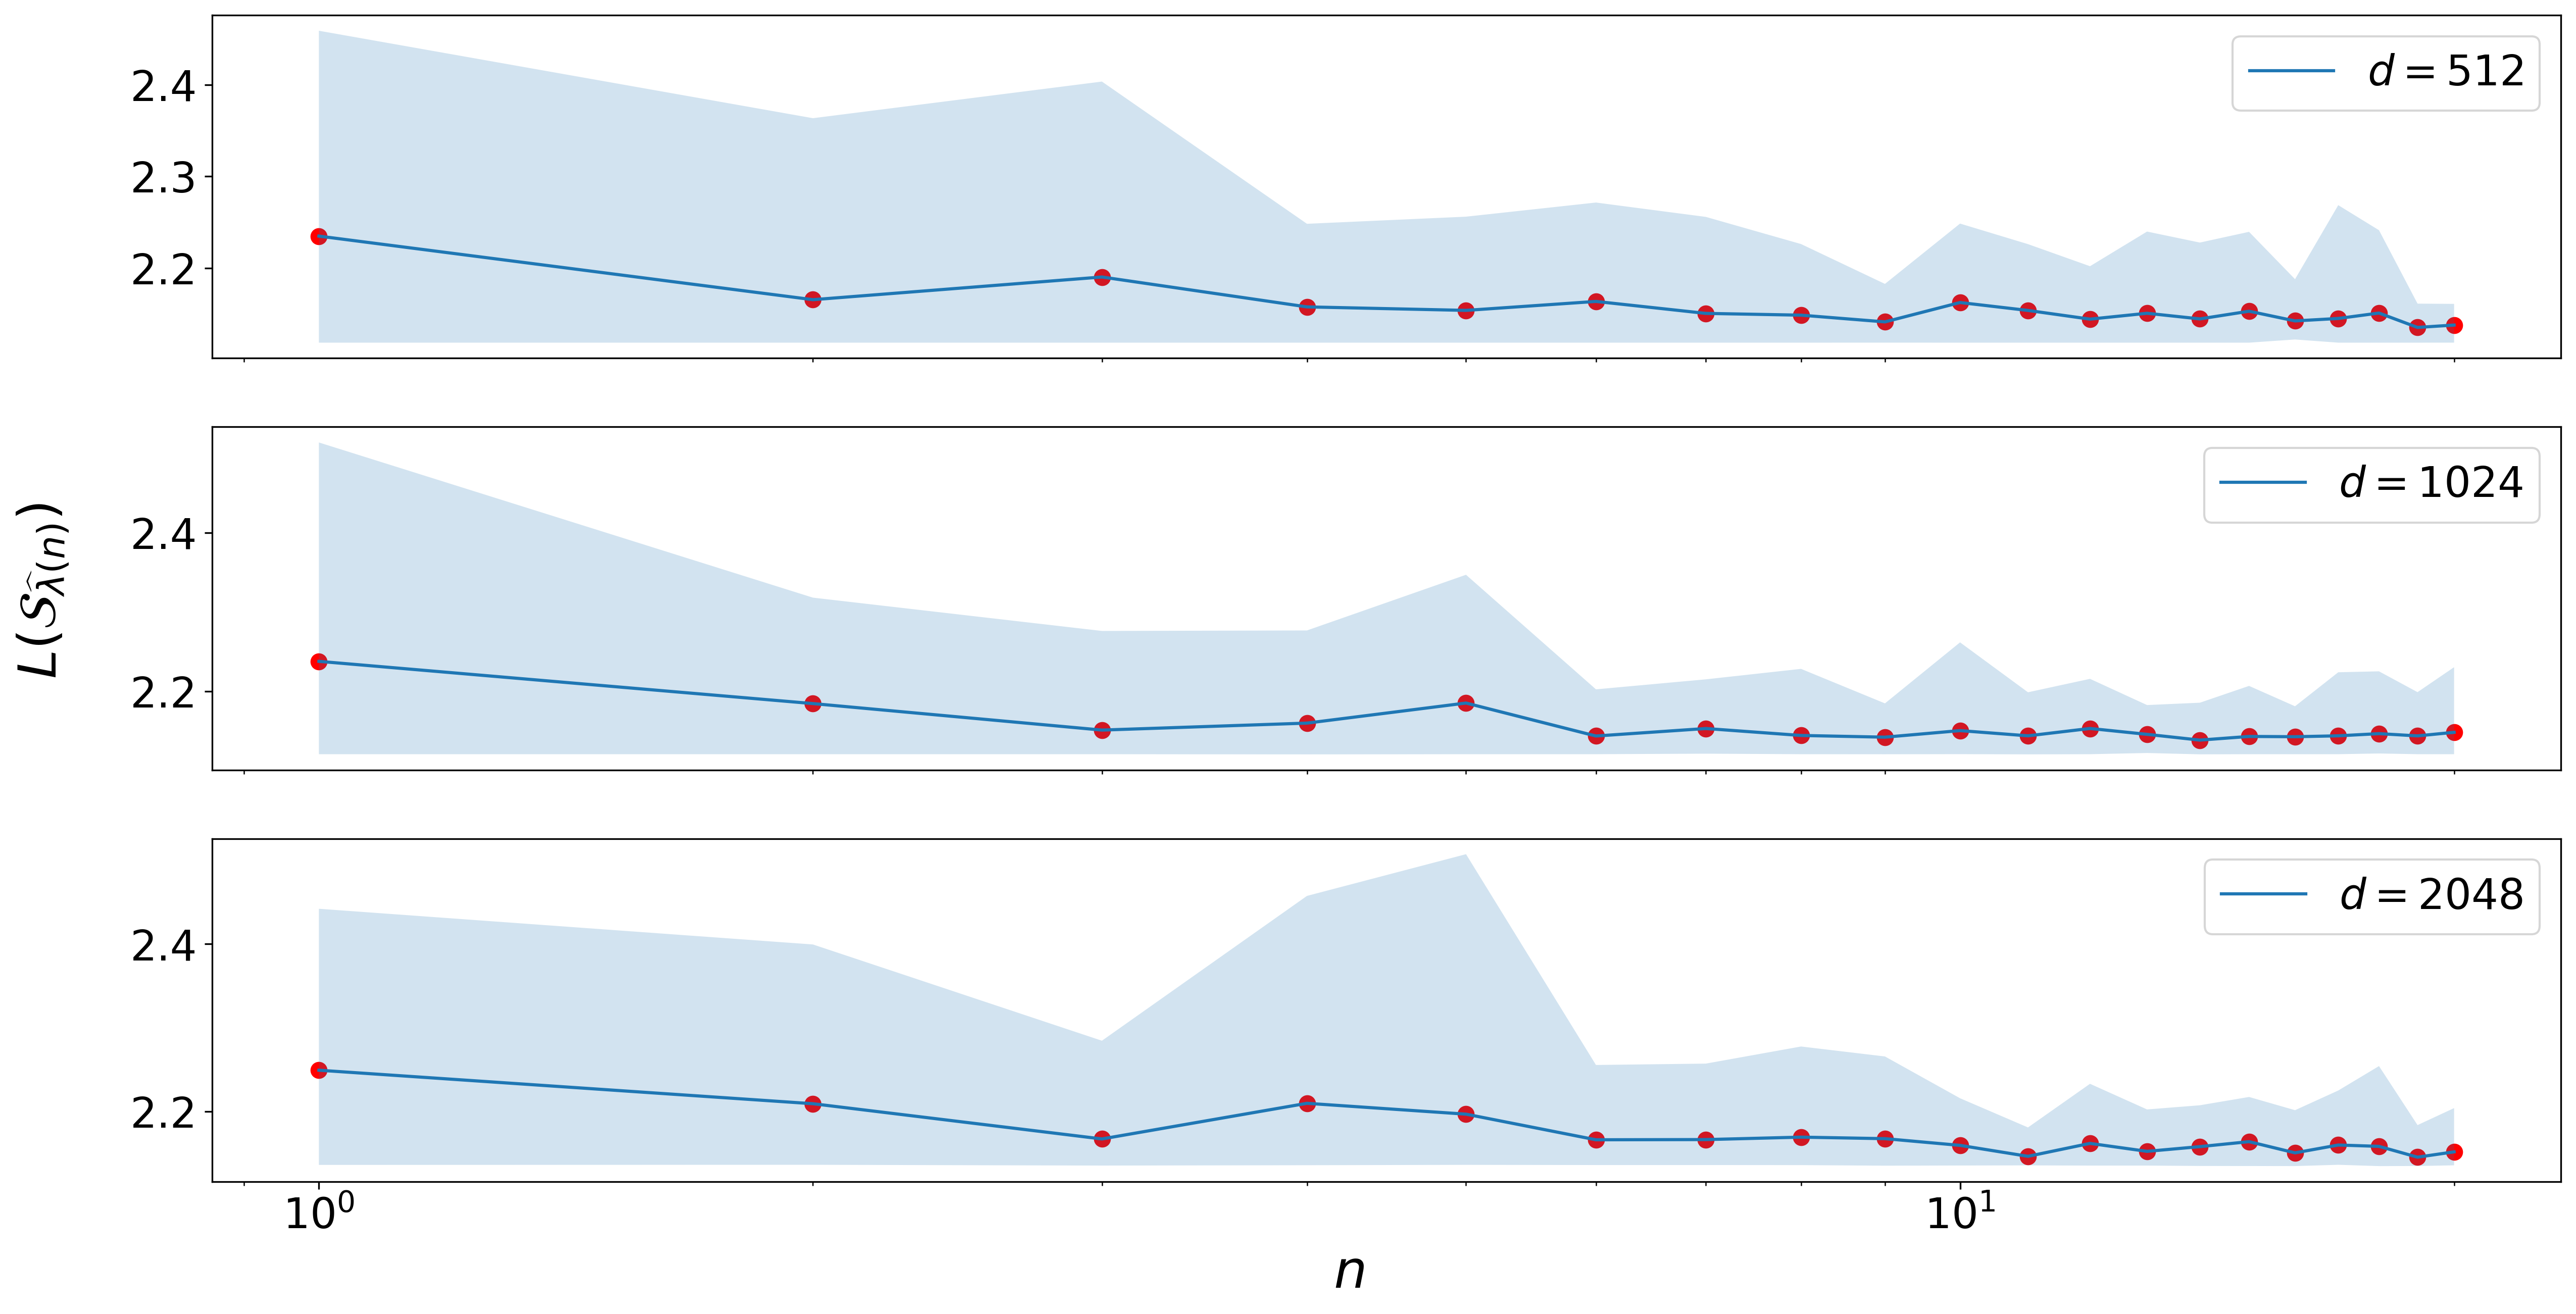

In [188]:
# Plots

mean1 = np.mean(L_at_lhatn1, axis=1)
lower1 = np.quantile(L_at_lhatn1, 0.05, axis=1)
upper1 = np.quantile(L_at_lhatn1, 0.95, axis=1)

mean2 = np.mean(L_at_lhatn2, axis=1)
lower2 = np.quantile(L_at_lhatn2, 0.05, axis=1)
upper2 = np.quantile(L_at_lhatn2, 0.95, axis=1)

mean3 = np.mean(L_at_lhatn3, axis=1)
lower3 = np.quantile(L_at_lhatn3, 0.05, axis=1)
upper3 = np.quantile(L_at_lhatn3, 0.95, axis=1)

# Figures

plt.close('all')
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 10), dpi=300)

ax1.plot(N_vec, mean1, '-', label=r'$d=512$')
ax1.scatter(N_vec, mean1, color='red', s=50) 
ax1.fill_between(N_vec, lower1, upper1, alpha=0.2)
#ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xticks([])  
ax1.legend(fontsize=20)

ax2.plot(N_vec, mean2, '-', label=r'$d=1024$')
ax2.scatter(N_vec, mean2, color='red', s=50) 
ax2.fill_between(N_vec, lower2, upper2, alpha=0.2)
#ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_xticks([])  
ax2.legend(fontsize=20)

ax3.plot(N_vec, mean3, '-', label=r'$d=2048$')
ax3.scatter(N_vec, mean3, color='red', s=50) 
ax3.fill_between(N_vec, lower3, upper3, alpha=0.2)
#ax3.set_ylabel(r'$L(X_{\widehat{\lambda}})$', fontsize=25)
#ax3.set_xlabel(r'$n$', fontsize=25)
#ax3.set_yscale('log')
ax3.set_xscale('log')
ax3.legend(fontsize=20)

fig.text(0.5, 0.04, r'$n$', ha='center', fontsize=25)
fig.text(0.06, 0.5, r'$L(\mathcal{S}_{\widehat{\lambda}(n)})$', va='center', rotation='vertical', fontsize=25)

for ax in [ax1, ax2, ax3]:
    ax.tick_params(axis='both', which='both', labelsize=20)

#plt.subplots_adjust(bottom=0.1)
#plt.xticks(fontsize=15)
# plt.yticks(fontsize=20)
plt.savefig("./fig7.pdf", bbox_inches='tight')  # This shud go before show
plt.show(block=False)


In [210]:
# Figure 8

lamb1 = np.logspace(-5, 0, num=2000)
lamb2 = np.logspace(-5, 0, num=500)

tau = np.logspace(-1, 0, num=30)

d = 1024
s = 16

bign = 500
smalln = 5
n_it = 30

lamb_star  = np.zeros(len(tau))
Lstardeno = np.zeros(len(tau))
Lhatdeno = np.zeros((len(tau), n_it))

def process_tau(tau_index):
    print('tau=', tau[tau_index])
    x_bign, y_bign = training_set(bign, tau[tau_index], d, s)
    
    lamb_star_single, Lstardeno_single = get_lambda(x_bign, y_bign, lamb1)  
    
    Lhatdeno_single = np.zeros(n_it)
    for j in range(n_it):
        x_smalln, y_smalln = training_set(smalln, tau[tau_index], d, s)
        lamb_hat = get_lambda(x_smalln, y_smalln, lamb2)[0]
        Lhatdeno_single[j] = train_l1(x_bign, y_bign, lamb_hat)
    
    return (lamb_star_single, Lstardeno_single, Lhatdeno_single)

results = Parallel(n_jobs=-1)(delayed(process_tau)(i) for i in range(len(tau)))

for i, result in enumerate(results):
    lamb_star[i], Lstardeno[i], Lhatdeno[i] = result

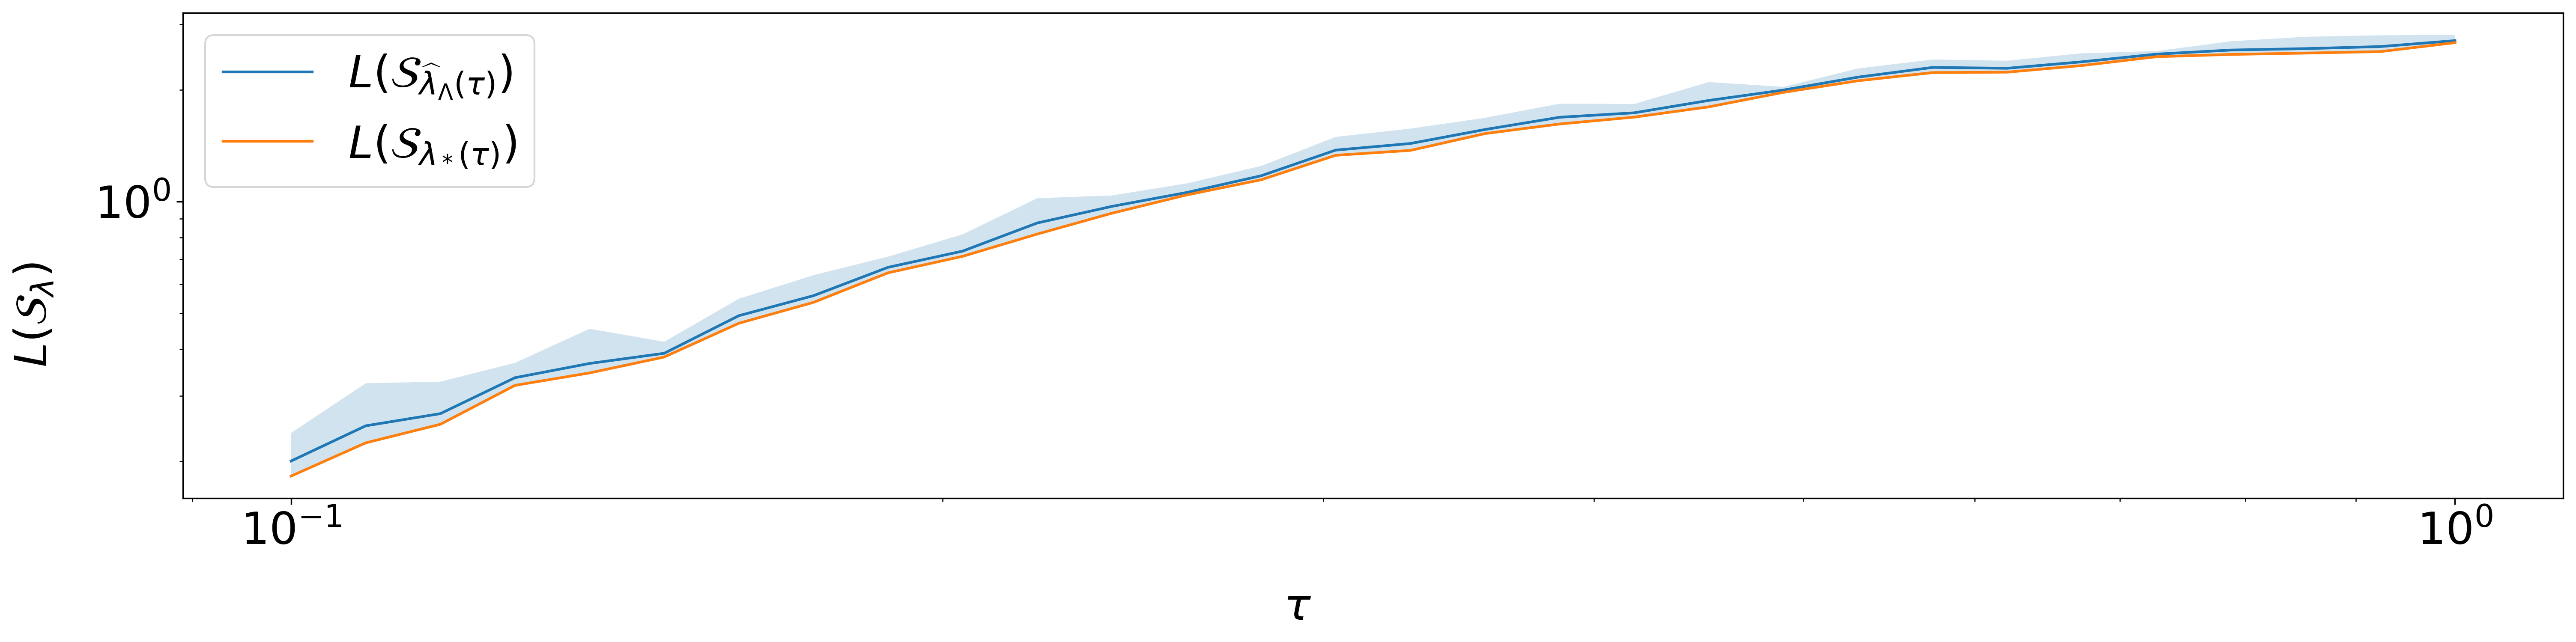

In [213]:
# Plot

dfden = pd.DataFrame(Lhatdeno)
meanden = dfden.mean(axis='columns') 
lowerden = np.quantile(Lhatdeno, 0.05, axis=1) 
upperden = np.quantile(Lhatdeno, 0.95, axis=1) 

plt.close('all')

fig, ax1 = plt.subplots(1, figsize=(20, 5), dpi=300)

ax1.plot(tau, meanden, linestyle='-', label=r'$L(\mathcal{S}_{\widehat{\lambda}_\Lambda(\tau)})$')
ax1.fill_between(tau, lowerden, upperden, alpha=0.2)
ax1.plot(tau, Lstardeno, linestyle='-', label=r'$L(\mathcal{S}_{\lambda_*(\tau)})$')
ax1.legend(fontsize=25)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.tick_params(axis='both', which='major', labelsize=25)
ax1.tick_params(axis='both', which='minor', labelsize=25)

fig.supxlabel(r'$\tau$', fontsize=25)
supylabel = fig.supylabel(r'$L(\mathcal{S}_\lambda)$', fontsize=25)
supylabel.set_position((0, 0.5)) 
#fig.supylabel('Loss', fontsize=25)
plt.tight_layout()
plt.savefig("./fig8.pdf", bbox_inches='tight')
plt.show(block='False')